# District Performance Grading Index (PGI) Analysis Using PySpark(mini project) #

In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>


## DataSet
District_PGI_Table_1 (1).csv, contains data related to the District Performance Grading Index (PGI) for the year 2021-22, which is an index used to assess the performance of the school education system at the district level across different States/Union Territories (UTs) in India.

The dataset has 748 rows, with each row representing a district. All columns appear to be complete with no missing values
### columns ###
#### 1. Sl. No. ####
This column is a Sequential Serial Number, providing a simple numerical index for each row in the dataset. It serves purely as a record identifier and has no analytical meaning regarding the district's performance or location.

#### 2. State/UT #### 
The State/UT column identifies the larger political and geographical entity—the State or Union Territory—to which the district belongs. It acts as the primary grouping variable, allowing for analysis and comparison of educational performance across major administrative regions in India.

#### 3. District
The District column provides the specific name of the administrative unit being assessed by the PGI. Since performance data is calculated and aggregated at the district level, this column is the key identifier for the educational system being evaluated in that particular area.

#### 4. Grade
The Grade column is a qualitative, categorical assessment of the district's overall performance. This textual label (e.g., 'Uttam', 'Ati-Uttam') is determined by which score range the district's final numerical score falls into, serving as an easy-to-understand summary of its status.

#### 5. District score 2021-22 - Overall
The District score 2021-22 - Overall is the cumulative numerical total achieved by the district for the evaluation year. This score is mathematically the sum of the scores from all six performance categories and directly dictates the district's Grade. It represents the final, comprehensive measure of the district's performance across the entire education system.

#### 6. District score 2021-22 - Category - 1.Outcome (290)
This score measures the district's performance in the Outcome domain, which is the most heavily weighted category (maximum 290 points). It focuses on the most critical results of the education system, such as student learning outcomes (achievement levels), attendance rates, and successful transition rates between educational stages.

#### 7. District score 2021-22 - Category - 2. ECT (90)
The score in this category is for Effective Classroom Transaction (ECT), with a maximum of 90 points. It assesses the quality of the teaching and learning processes within the schools, evaluating factors such as the effective use of technology, the adoption of good pedagogical practices, and the extent of teacher professional development and training.

#### 8. District score 2021-22 - Category - 3. IF&SE (51)
This column tracks the score for Infrastructure, Facilities, and Student Entitlements (IF&SE), with a maximum weight of 51 points. It assesses the availability and condition of essential physical school resources, including classrooms, libraries, computer labs, sanitation facilities, and the provision of entitlements like textbooks and uniforms to students.

#### 9. District score 2021-22 - Category - 4.SS&CP (35)
This score relates to School Safety and Child Protection (SS&CP), with a maximum of 35 points. It evaluates the measures a district has implemented to ensure a secure, inclusive, and emotionally supportive environment, including protocols for disaster management, legal compliance, and mechanisms for addressing child protection issues.

#### 10. District score 2021-22 - Category - 5. DL (50)
The Digital Learning (DL) score, with a maximum of 50 points, reflects the district's capacity and success in integrating digital technologies into its educational framework. This includes the availability of IT infrastructure, the use of digital content, and the digital literacy levels of both teachers and students.

#### 11. District score 2021-22 - Category - 6. GP (84)
Finally, this column provides the score for Governance Process (GP), weighted at a maximum of 84 points. It assesses the administrative and management efficiency of the district's education system, focusing on areas like data-based planning, financial accountability, transparency in recruitment, and the effectiveness of management information systems.

## Relationships Between Columns
### 1. Component-to-Overall Score Relationship (Numerical)
The most significant relationship is the numerical link between the six category scores and the overall score.

The Overall Score is the sum of the scores from the six individual categories.

Overall Score=Category 1+Category 2+Category 3+Category 4+Category 5+Category 6
The maximum possible overall score is the sum of the maximum scores for all categories:

290+90+51+35+50+84=600
This means that a district's overall performance is a direct reflection of its performance across these six specific areas of the school education system.

### 2. Score-to-Grade Relationship (Categorical/Ordinal)
The Grade column has an ordinal relationship with the Overall Score. The Grade is a categorical label assigned based on the range in which the Overall Score falls. For example, a certain range of scores corresponds to 'Ati-Uttam', another range to 'Uttam', and so on. This column summarizes the numerical performance into a qualitative assessment.

### 3. Geographical Relationship
The District column is nested within the State/UT column. Analyzing the data would reveal how districts within the same State/UT perform relative to each other, and how entire State/UT averages compare nationally. This relationship allows for geographical comparison and benchmarking.

In [2]:
# 📊 PGI Analysis — District-level (2021–22)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import os

# Load dataset
df = pd.read_csv("District_PGI_Table_1 (1).csv")
print("✅ Dataset Loaded:", df.shape)
df

✅ Dataset Loaded: (748, 11)


,Sl. No.,State/UT,District,Grade,District score 2021-22 - Overall,District score 2021-22 - Category - 1.Outcome (290),District score 2021-22 - Category - 2. ECT (90),District score 2021-22 - Category - 3. IF&SE (51),District score 2021-22 - Category - 4.SS&CP (35),District score 2021-22 - Category - 5. DL (50),District score 2021-22 - Category - 6. GP (84)
0,1,Andaman and Nicobar Islands,Middle and North Andamans,Uttam,381,139,85,39,32,15,69
1,2,Andaman and Nicobar Islands,Andamans,Uttam,375,134,86,38,30,22,63
2,3,Andaman and Nicobar Islands,Nicobars,Uttam,367,134,85,40,33,16,59
3,4,Andhra Pradesh,Visakhapatnam,Uttam,397,153,84,41,35,18,66
4,5,Andhra Pradesh,Guntur,Uttam,393,146,86,36,35,16,74
...,...,...,...,...,...,...,...,...,...,...,...
743,744,West Bengal,Birbhum,Prachesta-1,343,120,78,41,31,20,54
744,745,West Bengal,Siliguri,Prachesta-1,338,135,79,20,25,25,54
745,746,West Bengal,Kalimpong,Prachesta-1,330,123,79,33,35,14,46
746,747,West Bengal,Uttar Dinajpur,Prachesta-1,315,115,74,34,20,18,54


In [3]:
# --- Shorten column names ---
col_map = {c: c.strip().replace(' ', '_').replace('-', '_').replace('.', '').replace('&','and').replace('(','').replace(')','') for c in df.columns}
df.rename(columns=col_map, inplace=True)

# Shortcuts for common columns
df.rename(columns={'State/UT':'State', 'District':'Dist', 'Overall_Score':'Overall'}, inplace=True)

In [4]:
# --- Basic info ---
print(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 11 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Sl_No                                             748 non-null    int64 
 1   State                                             748 non-null    object
 2   Dist                                              748 non-null    object
 3   Grade                                             748 non-null    object
 4   District_score_2021_22___Overall                  748 non-null    int64 
 5   District_score_2021_22___Category___1Outcome_290  748 non-null    int64 
 6   District_score_2021_22___Category___2_ECT_90      748 non-null    int64 
 7   District_score_2021_22___Category___3_IFandSE_51  748 non-null    int64 
 8   District_score_2021_22___Category___4SSandCP_35   748 non-null    int64 
 9   District_score_2021_22___Categor

,Sl_No,District_score_2021_22___Overall,District_score_2021_22___Category___1Outcome_290,District_score_2021_22___Category___2_ECT_90,District_score_2021_22___Category___3_IFandSE_51,District_score_2021_22___Category___4SSandCP_35,District_score_2021_22___Category___5_DL_50,District_score_2021_22___Category___6_GP_84
count,748.00000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,374.50000,346.104278,132.446524,76.767380,37.022727,27.707219,13.096257,59.085561
std,216.07329,51.209806,23.642894,10.232997,6.335195,7.406434,8.207897,12.381947
min,1.00000,140.000000,70.000000,11.000000,11.000000,0.000000,1.000000,14.000000
25%,187.75000,312.750000,115.750000,74.000000,33.000000,25.000000,6.000000,53.000000
50%,374.50000,348.000000,131.000000,80.000000,38.000000,30.000000,12.000000,59.000000
75%,561.25000,383.000000,148.000000,83.000000,42.000000,34.000000,18.000000,66.000000
max,748.00000,468.000000,212.000000,88.000000,49.000000,35.000000,34.000000,84.000000


In [5]:
# --- Grade Distribution ---
print("\nGrade Counts:")
print(df['Grade'].value_counts())


Grade Counts:
Grade
Prachesta-1    290
Uttam          271
Prachesta-2    117
Ati-Uttam       51
Prachesta-3     18
Akanshi-1        1
Name: count, dtype: int64


In [6]:
# Automatically detect the overall score column
overall_candidates = [c for c in df.columns if 'Overall' in c or 'overall' in c]
if overall_candidates:
    overall_col = overall_candidates[0]
    print("\n✅ Detected Overall Score Column:", overall_col)
else:
    raise KeyError("❌ Could not detect Overall Score column automatically. Check column names above.")



✅ Detected Overall Score Column: District_score_2021_22___Overall


In [7]:
# --- Top/Bottom Districts ---
top10 = df.nlargest(10, overall_col)
bottom10 = df.nsmallest(10, overall_col)

print("\n🏆 Top 10 Districts:")
display(top10[['State','Dist',overall_col]])
print("\n⚠️ Bottom 10 Districts:")
display(bottom10[['State','Dist',overall_col]])


🏆 Top 10 Districts:


,State,Dist,District_score_2021_22___Overall
496,Punjab,Barnala,468
497,Punjab,Firozpur,457
498,Punjab,Muktsar,452
499,Punjab,Taran Taran,446
115,Chandigarh,Chandigarh,444
519,Rajasthan,Dhaulpur,444
500,Punjab,Bathinda,443
308,Kerala,Thrissur,442
147,Delhi,New Delhi,441
309,Kerala,Thiruvananthapuram,441



⚠️ Bottom 10 Districts:


,State,Dist,District_score_2021_22___Overall
76,Assam,South Salmara- Mankachar,140
747,West Bengal,Darjiling,194
439,Meghalaya,North Garo Hills,196
438,Meghalaya,South Garo Hills,202
41,Arunachal Pradesh,SHI YOMI,205
437,Meghalaya,West Garo Hills,210
436,Meghalaya,East Jaintia Hills,213
40,Arunachal Pradesh,Upper Subansiri,219
435,Meghalaya,East Garo Hills,221
39,Arunachal Pradesh,Kurung Kumey,223


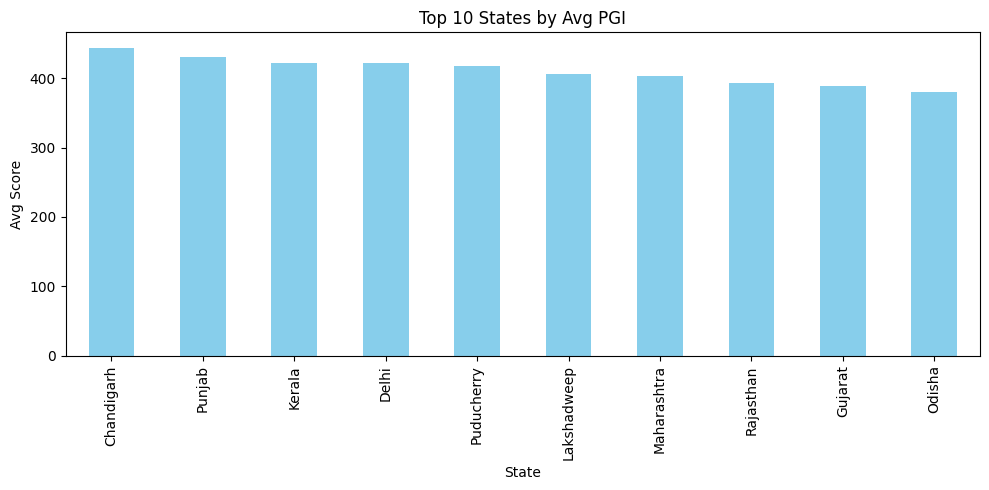

In [8]:
# --- CHART 1: State-wise Average ---
plt.figure(figsize=(10,5))
df.groupby('State')[overall_col].mean().sort_values(ascending=False).head(10).plot(
    kind='bar', color='skyblue', title="Top 10 States by Avg PGI"
)
plt.ylabel("Avg Score")
plt.tight_layout()
plt.show()
plt.close()



📚 Category Columns: ['District_score_2021_22___Category___1Outcome_290', 'District_score_2021_22___Category___2_ECT_90', 'District_score_2021_22___Category___3_IFandSE_51', 'District_score_2021_22___Category___4SSandCP_35', 'District_score_2021_22___Category___5_DL_50', 'District_score_2021_22___Category___6_GP_84']


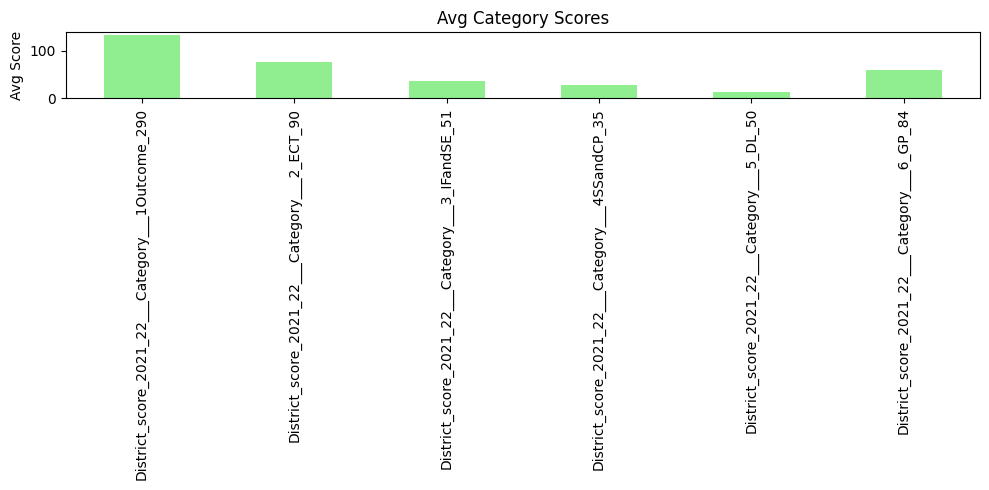

In [9]:
# --- CHART 2: Category-wise Analysis ---
# List the category columns based on the new, cleaned names
cat_cols = [c for c in df.columns if 'Category' in c]
print("\n📚 Category Columns:", cat_cols)

plt.figure(figsize=(10,5))
df[cat_cols].mean().plot(kind='bar', color='lightgreen', title="Avg Category Scores")
plt.ylabel("Avg Score")
plt.tight_layout()
plt.show()
plt.close()



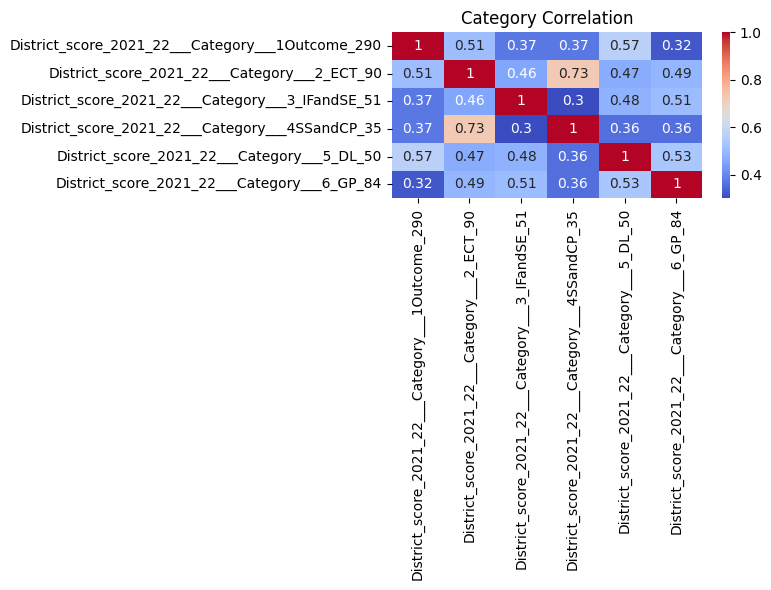

In [10]:
# --- CHART 3: Correlation Heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(df[cat_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Category Correlation")
plt.tight_layout()
plt.show()
plt.close()



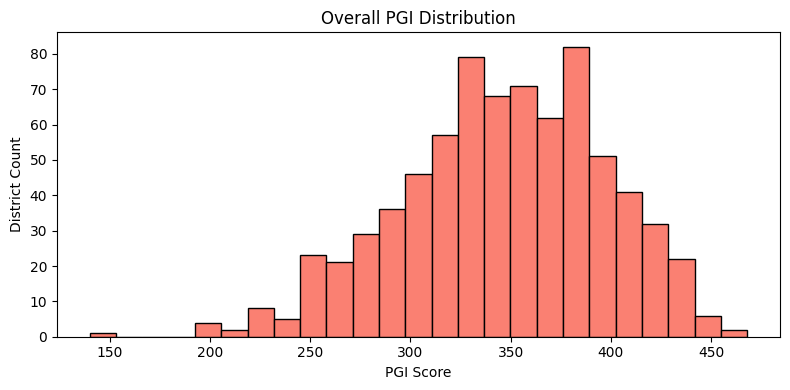

In [11]:
# --- CHART 4: Distribution of Overall ---
plt.figure(figsize=(8,4))
df[overall_col].plot(kind='hist', bins=25, color='salmon', edgecolor='black', title="Overall PGI Distribution")
plt.xlabel("PGI Score")
plt.ylabel("District Count")
plt.tight_layout()
plt.show()
plt.close()


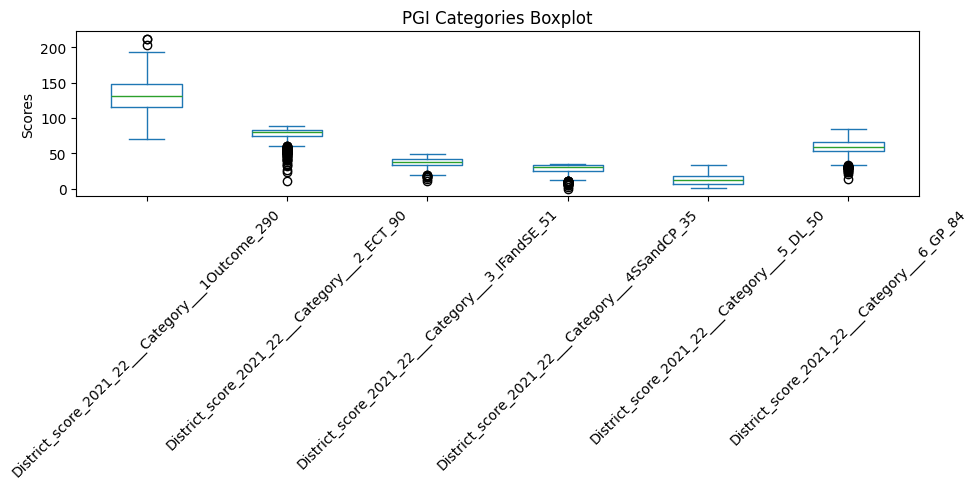

In [12]:

# --- CHART 5: Boxplot of Categories ---
plt.figure(figsize=(10,5))
df[cat_cols].plot(kind='box', rot=45, title="PGI Categories Boxplot", ax=plt.gca())
plt.ylabel("Scores")
plt.tight_layout()


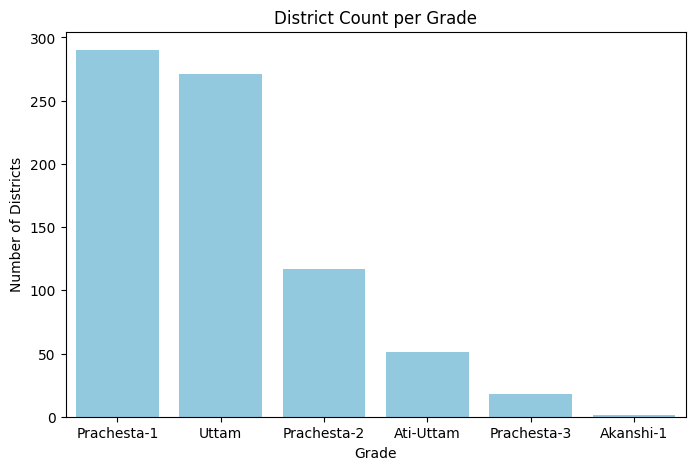

In [13]:
# --- District Count per Grade ---
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Grade',
    order=df['Grade'].value_counts().index,
    color="skyblue"
)
plt.title("District Count per Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Districts")
plt.show()


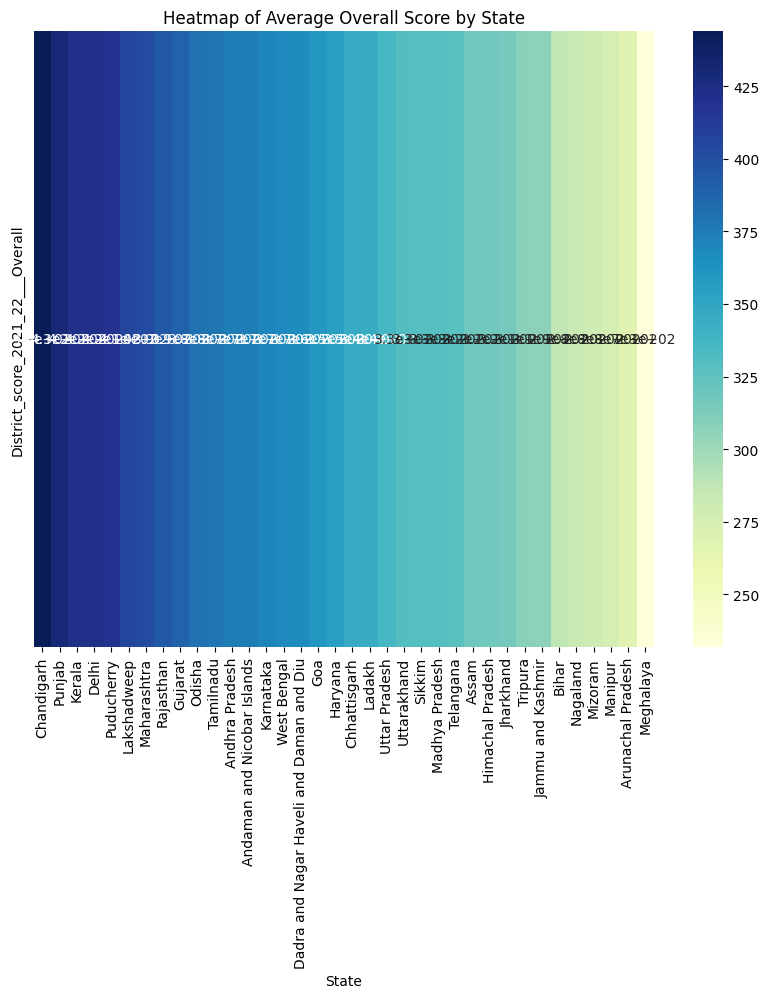

In [14]:
# --- State vs Overall Heatmap ---
state_overall = df.groupby('State')[overall_col].mean().sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.heatmap(state_overall.to_frame().T, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Heatmap of Average Overall Score by State")
plt.show()

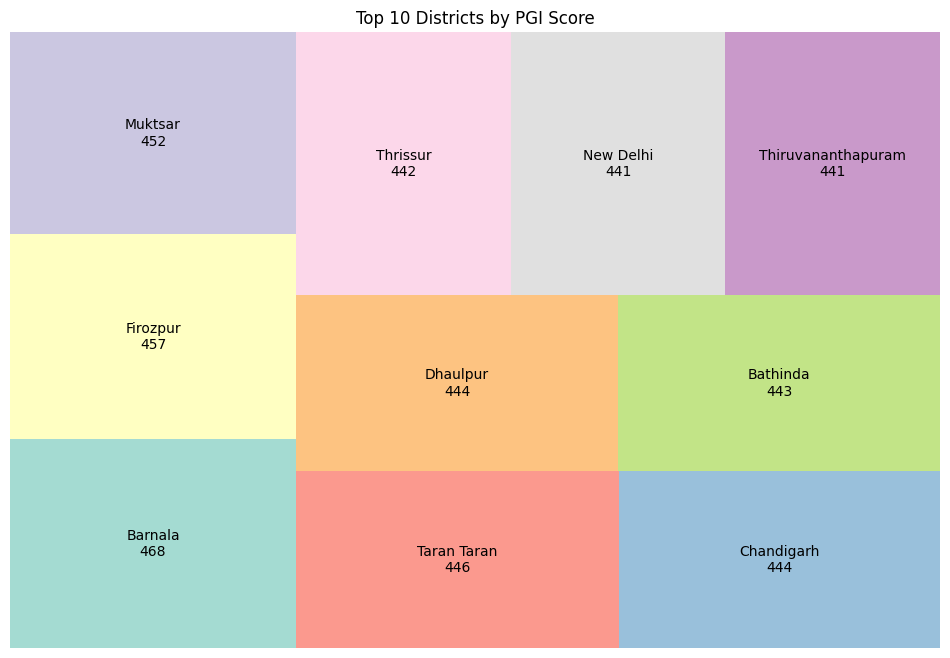

In [15]:
# --- Top Districts in a Treemap ---
plt.figure(figsize=(12,8))
sizes = top10[overall_col]
labels = top10['Dist'] + "\n" + top10[overall_col].round(2).astype(str)
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=sns.color_palette("Set3"))
plt.title("Top 10 Districts by PGI Score")
plt.axis('off')
plt.show()

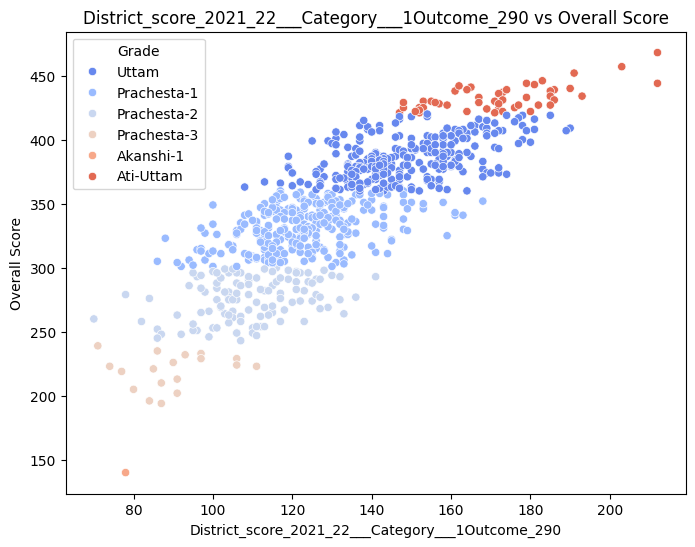

In [16]:
# --- Scatter Plot: Categories vs Overall Score ---
plt.figure(figsize=(8,6))
if len(cat_cols) >= 2:
    sns.scatterplot(data=df, x=cat_cols[0], y=overall_col, hue='Grade', palette="coolwarm")
    plt.title(f"{cat_cols[0]} vs Overall Score")
    plt.xlabel(cat_cols[0])
    plt.ylabel("Overall Score")
    plt.show()

In [17]:
# 2️⃣ Number of districts in each grade
print("\nDistrict count per grade:")
print(df.groupby("Grade").size().reset_index(name="count"))


District count per grade:
         Grade  count
0    Akanshi-1      1
1    Ati-Uttam     51
2  Prachesta-1    290
3  Prachesta-2    117
4  Prachesta-3     18
5        Uttam    271


In [18]:
# 1️⃣ Number of districts in each state
print("District count per state:")
print(df.groupby("State").size().reset_index(name="count"))


District count per state:
                                       State  count
0                Andaman and Nicobar Islands      3
1                             Andhra Pradesh     13
2                          Arunachal Pradesh     26
3                                      Assam     35
4                                      Bihar     38
5                                 Chandigarh      1
6                               Chhattisgarh     28
7   Dadra and Nagar Haveli and Daman and Diu      3
8                                      Delhi     13
9                                        Goa      2
10                                   Gujarat     33
11                                   Haryana     22
12                          Himachal Pradesh     12
13                         Jammu and Kashmir     20
14                                 Jharkhand     24
15                                 Karnataka     35
16                                    Kerala     14
17                                    

In [19]:
# 3️⃣ Number of districts in each state and grade
print("\nDistrict count per state and grade:")
print(df.groupby(["State", "Grade"]).size().reset_index(name="count"))


District count per state and grade:
                          State        Grade  count
0   Andaman and Nicobar Islands        Uttam      3
1                Andhra Pradesh  Prachesta-1      2
2                Andhra Pradesh        Uttam     11
3             Arunachal Pradesh  Prachesta-1      2
4             Arunachal Pradesh  Prachesta-2     17
..                          ...          ...    ...
81                  Uttarakhand        Uttam      1
82                  West Bengal    Ati-Uttam      1
83                  West Bengal  Prachesta-1      6
84                  West Bengal  Prachesta-3      1
85                  West Bengal        Uttam     16

[86 rows x 3 columns]


In [21]:

# 4️⃣ Min, Max, Avg Overall score per state
print("\nMin, Max, Avg Overall score per state:")
print(df.groupby("State")["District_score_2021_22___Overall"].agg(["min", "max", "mean"]).reset_index())



Min, Max, Avg Overall score per state:
                                       State  min  max        mean
0                Andaman and Nicobar Islands  367  381  374.333333
1                             Andhra Pradesh  341  397  374.538462
2                          Arunachal Pradesh  205  361  268.000000
3                                      Assam  140  371  318.685714
4                                      Bihar  223  338  287.473684
5                                 Chandigarh  444  444  444.000000
6                               Chhattisgarh  305  391  346.107143
7   Dadra and Nagar Haveli and Daman and Diu  354  387  366.666667
8                                      Delhi  399  441  421.923077
9                                        Goa  357  362  359.500000
10                                   Gujarat  341  429  389.181818
11                                   Haryana  308  387  354.818182
12                          Himachal Pradesh  249  358  316.666667
13                    

In [22]:

# 5️⃣ Districts with Overall score above state average
state_avg = df.groupby("State")["District_score_2021_22___Overall"].mean().reset_index(name="avg_score")
df_with_avg = df.merge(state_avg, on="State")
print("\nDistricts with Overall score above state average:")
print(df_with_avg[df_with_avg["District_score_2021_22___Overall"] > df_with_avg["avg_score"]][["State", "Dist", "District_score_2021_22___Overall", "avg_score"]])



Districts with Overall score above state average:
                           State                       Dist  \
0    Andaman and Nicobar Islands  Middle and North Andamans   
1    Andaman and Nicobar Islands                   Andamans   
3                 Andhra Pradesh              Visakhapatnam   
4                 Andhra Pradesh                     Guntur   
5                 Andhra Pradesh               Vizianagaram   
..                           ...                        ...   
734                  West Bengal                     Maldah   
735                  West Bengal                    Bankura   
736                  West Bengal           Dakshin Dinajpur   
737                  West Bengal          Paschim Medinipur   
738                  West Bengal            Purba Medinipur   

     District_score_2021_22___Overall   avg_score  
0                                 381  374.333333  
1                                 375  374.333333  
3                                 39

In [25]:
# 6️⃣ Top 5 districts per state
state_avg = df.groupby("State")["District_score_2021_22___Overall"].mean().reset_index(name="avg_score")
df_with_avg = df.merge(state_avg, on="State")

print("\nTop 5 districts per state:")
top5 = df_with_avg.sort_values(["State", "District_score_2021_22___Overall"], ascending=[True, False]) \
                  .groupby("State").head(5)
print(top5[["State", "Dist", "District_score_2021_22___Overall"]])


Top 5 districts per state:
                           State                       Dist  \
0    Andaman and Nicobar Islands  Middle and North Andamans   
1    Andaman and Nicobar Islands                   Andamans   
2    Andaman and Nicobar Islands                   Nicobars   
3                 Andhra Pradesh              Visakhapatnam   
4                 Andhra Pradesh                     Guntur   
..                           ...                        ...   
724                  West Bengal                    Kolkata   
725                  West Bengal                    Hooghly   
726                  West Bengal            Purba Bardhaman   
727                  West Bengal  North Twenty Four Pargana   
728                  West Bengal                Murshidabad   

     District_score_2021_22___Overall  
0                                 381  
1                                 375  
2                                 367  
3                                 397  
4              

### Conclusion: ###
The analysis of the District PGI 2021-22 data reveals a clear picture of the state of school education across India: one marked by moderate overall performance and significant systemic imbalances.
While the majority of districts fall within the mid-tier ('Prachesta-1' and 'Uttam' grades) with an average score of approximately 57.7% of the maximum, this score is propped up by high compliance in Effective Classroom Transaction (85% of max) and Safety (79% of max).


